# Análise de Acidentes Aeronáuticos




**Nome:** Marcelo José Maturano

**Dataset:** [FAB Dataset](https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)


# 1. Definição do Problema



- **Descrição:** Este Dataset será explorado, após verificar-se um aumento expressivo no número de acidentes nos últimos anos, visto isto, surgiram as seguintes hipóteses, que será verificado com análise exploratória dos dados.

- **Tipo de problema:** Análise exploratória de dados (não supervisionado).

- **Hipóteses:**

* 1 - Os acidentes ocorrem por falha humana

* 2 -  Os fatores metereológicos contribuem para falhas humanas

* 3 - Algum tipo de aeronave que se destaca no número de acidentes

* 4 - Caso haja alguma aeronave específica, qual aeronave e qual tipo de falha

* 5 - Há como avaliar se a decorrência do tipo de falha está relacionada, devido algum problema na manutenção das aeronaves.


- **Restrições:** Foram utilizados apenas registros completos, com datas e identificação de modelo.
As informações de dados metereológicos nos datasets importados do portal do governo feral-FAB-CENIPA, estão ausentes.

- **Atributos:** Descreva cada coluna relevante do seu DataFrame (ex: data, modelo, localização, etc.).

### Importando Bibliotecas

In [1]:
# Bibliotecas principais para Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

### Baixando arquivos






In [2]:
import gdown
url = "https://drive.google.com/drive/folders/1wdWK4E-QiOjynHtlCOanXJWTMpHPESgs?usp=drive_link"
pasta = gdown.download_folder(url)
pasta


Retrieving folder contents


Processing file 1aP0LRYgCPO-pMUm16-6a-ZjsWRHDP2kU ocorrencia.csv
Processing file 1yNKCCM4-nmcCVKJbe_PdzD3B-6aNgDxh ocorrencia_tipo.csv
Processing file 12W908dkhEZ1XxkbD-86WMb8VvOC7pY-U aeronave.csv
Processing file 1x9q1BOQBNnuiElG13XvyxX_KFhpMRFbS fator_contribuinte.csv
Processing file 1_V52HSPlx6rwbwdTX8MrVCqr0zKvC2Fj recomendacao.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1aP0LRYgCPO-pMUm16-6a-ZjsWRHDP2kU
To: /content/arquivos_fab/ocorrencia.csv
100%|██████████| 1.94M/1.94M [00:00<00:00, 61.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yNKCCM4-nmcCVKJbe_PdzD3B-6aNgDxh
To: /content/arquivos_fab/ocorrencia_tipo.csv
100%|██████████| 1.09M/1.09M [00:00<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12W908dkhEZ1XxkbD-86WMb8VvOC7pY-U
To: /content/arquivos_fab/aeronave.csv
100%|██████████| 2.43M/2.43M [00:00<00:00, 30.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x9q1BOQBNnuiElG13XvyxX_KFhpMRFbS
To: /content/arquivos_fab/fator_contribuinte.csv
100%|██████████| 729k/729k [00:00<00:00, 33.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_V52HSPlx6rwbwdTX8MrVCqr0zKvC2Fj
To: /content/arquivos_fab/recomendacao.csv
100%|██████████| 1.37M/1.37M [00:00<0

['/content/arquivos_fab/ocorrencia.csv',
 '/content/arquivos_fab/ocorrencia_tipo.csv',
 '/content/arquivos_fab/aeronave.csv',
 '/content/arquivos_fab/fator_contribuinte.csv',
 '/content/arquivos_fab/recomendacao.csv']

# 2. **Análise Exploratória de Dados**

## Importando o dataset para *análise*



In [3]:
import pandas as pd
df_ocorrencias = pd.read_csv(pasta[0],encoding="UTF-8",sep=";",low_memory=False)
df_ocorrencias_tipo = pd.read_csv(pasta[1],encoding="UTF-8",sep=";",low_memory=False)
df_fator_contribuinte = pd.read_csv(pasta[3],encoding="UTF-8",sep=";",low_memory=False)
df_aeronave = pd.read_csv(pasta[2],encoding="UTF-8",sep=";",low_memory=False)

df_ocorrencias: contém os registros das ocorrências analisadas, incluindo informações detalhadas sobre cada evento.

df_ocorrencias_tipo: traz a classificação dos tipos de ocorrência, permitindo identificar a natureza de cada evento registrado em df_ocorrencias.

df_fator_contribuinte: relaciona os fatores que contribuíram para cada tipo de ocorrência, possibilitando uma análise das causas envolvidas nos eventos.

df_aeronave: vincula as aeronaves envolvidas às respectivas ocorrências, facilitando a análise por modelo, fabricante ou características específicas das aeronaves.

# 3. **Exploração inicial dos dados**

Nesta etapa, realizaremos uma análise detalhada das tabelas disponíveis, identificando e tratando os atributos essenciais para garantir a qualidade e a consistência dos dados que serão utilizados nas próximas etapas.

In [4]:
df_ocorrencias.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,86683,86683,86683,86683,86683,INCIDENTE GRAVE,NaN,NaN,SALGUEIRO,PE,...,09/03/2025,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,86682,86682,86682,86682,86682,INCIDENTE,-15.76194444444,-48.01527777777,BRASÍLIA,DF,...,04/10/2024,19:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,86678,86678,86678,86678,86678,INCIDENTE,-22.34277777777,-41.76388888888,MACAÉ,RJ,...,08/03/2025,15:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,86677,86677,86677,86677,86677,INCIDENTE,-22.03055555555,-41.06861111111,CAMPOS DOS GOYTACAZES,RJ,...,05/03/2025,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,86676,86676,86676,86676,86676,ACIDENTE,-5.685833333333,-48.11416666666,ARAGUATINS,TO,...,01/03/2025,14:00:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM


O DataFrame df_ocorrências reúne diversos detalhes sobre cada ocorrência. No entanto, para o estudo das hipóteses mencionadas anteriormente, **apenas as colunas codigo_ocorrencia, ocorrencia_dia e ocorrencia_classificacao são relevantes para esta análise.**

In [5]:
# Eliminando colunas que não interessam
df_ocorrencias = df_ocorrencias.drop(columns=["codigo_ocorrencia1","codigo_ocorrencia2","codigo_ocorrencia3","codigo_ocorrencia4"])

As colunas codigo_ocorrencia1, codigo_ocorrencia2, codigo_ocorrencia3 e codigo_ocorrencia4 foram removidas, pois possuem valores idênticos à coluna **codigo_ocorrencia**. Por isso, utilizaremos apenas essa última para realizar a relação com as demais tabelas.

In [6]:
# Columas que interessam
df_ocorrencias = df_ocorrencias[["codigo_ocorrencia","ocorrencia_dia","ocorrencia_classificacao"]].copy()


Neste passo, estou filtrando apenas as variáveis de interesse, que serão utilizadas ao longo da análise.

In [7]:
# Dimensões do dataset
print(f'Dimensões do dataset: {df_ocorrencias.shape}')

Dimensões do dataset: (12876, 3)


In [8]:
# Tipos das variáveis
df_ocorrencias.dtypes

,0
codigo_ocorrencia,int64
ocorrencia_dia,object
ocorrencia_classificacao,object


In [9]:
# Checagem de valores faltantes por coluna
df_ocorrencias.isnull().sum()

,0
codigo_ocorrencia,0
ocorrencia_dia,0
ocorrencia_classificacao,0


Verificamos que as colunas selecionadas para a análise não apresentam valores nulos, garantindo a integridade dos dados utilizados.

###3.1 Analisando tabelas auxiliares

Fazendo a mesma análise para o DataFrame df_ocorrencias_tipo, examino suas dimensões e os dados presentes, a fim de entender sua composição e avaliar sua adequação para a análise.

In [10]:
df_ocorrencias_tipo.head()


,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,86683,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP
1,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
3,86677,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,86676,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE


Excluindo as colunas codigo_ocorrencia1 e ocorrencia_tipo, pois não interessam para análise, sendo que ocorrencia_tipo tem as mesmas informações de ocorrencia ipo categoria.

In [11]:
# Dimensões do dataset
print(f'Dimensões do dataset: {df_ocorrencias_tipo.shape}')



Dimensões do dataset: (13576, 4)


In [12]:
# Checagem dos tipos após conversão
df_ocorrencias_tipo.dtypes

,0
codigo_ocorrencia1,int64
ocorrencia_tipo,object
ocorrencia_tipo_categoria,object
taxonomia_tipo_icao,object


Informando as colunas vazias, na tabela ocorrencias tipo

In [13]:
df_ocorrencias_tipo.isnull().sum()

,0
codigo_ocorrencia1,0
ocorrencia_tipo,4
ocorrencia_tipo_categoria,4
taxonomia_tipo_icao,4


Também estou examinando as dimensões e os dados do DataFrame df_fator_contribuinte, visando entender como as informações estão organizadas e avaliar sua relevância para a análise

In [14]:
df_fator_contribuinte.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,84399,CONDIÇÕES METEOROLÓGICAS ADVERSAS,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,***,FATOR OPERACIONAL
1,84399,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,84399,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,84201,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,84201,INFRAESTRUTURA AEROPORTUÁRIA,INFRAESTRUTURA AEROPORTUÁRIA,***,FATOR OPERACIONAL


In [15]:
print(f'Dimensões do dataset: {df_fator_contribuinte.shape}')


Dimensões do dataset: (8515, 5)


In [16]:
df_fator_contribuinte.dtypes

,0
codigo_ocorrencia3,int64
fator_nome,object
fator_aspecto,object
fator_condicionante,object
fator_area,object


In [17]:
df_fator_contribuinte.isnull().sum()

,0
codigo_ocorrencia3,0
fator_nome,0
fator_aspecto,0
fator_condicionante,0
fator_area,0


Estou analisando as dimensões e os dados do DataFrame **df_aeronaves** para compreender sua estrutura e conteúdo.

In [18]:
df_aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,86683,PRZND,***,AVIÃO,JADER ROCHA DUTRA,TUCANO RÉPLICA,***,***,***,650.0,...,BRASIL,BRASIL,AVIÃO,***,CATULEVE,CONDOMÍNIO AERONÁUTICO HANGAR FLY RESIDENCE,CRUZEIRO,EXPERIMENTAL,LEVE,0.0
1,86682,PRDHL,***,HELICÓPTERO,EUROCOPTER,EC 130 B4,EC30,TURBOEIXO,MONOMOTOR,2427.0,...,BRASIL,BRASIL,HELICÓPTERO,***,BASE RESGATE,BASE RESGATE,POUSO,POLICIAL,LEVE,0.0
2,86678,PRBGU,***,HELICÓPTERO,SIKORSKY,S-92A,S92,TURBOEIXO,BIMOTOR,12020.0,...,BRASIL,BRASIL,HELICÓPTERO,***,MACAÉ,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,LEVE,0.0
3,86677,PRJKK,***,***,SIKORSKY AIRCRAFT,S-92A,S92,NaN,BIMOTOR,12020.0,...,BRASIL,BRASIL,***,***,FORA DE AERODROMO,SÃO TOMÉ,APROXIMAÇÃO FINAL,TÁXI AÉREO,NENHUM,0.0
4,86676,PTWAH,***,AVIÃO,BEECH AIRCRAFT,C90A,BE9L,TURBOÉLICE,BIMOTOR,4581.0,...,BRASIL,BRASIL,AVIÃO,***,GURUPI,ARAGUATINS,POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0


In [19]:
df_aeronave.shape

(12989, 23)

In [20]:
df_aeronave.dtypes

,0
codigo_ocorrencia2,int64
aeronave_matricula,object
aeronave_operador_categoria,object
aeronave_tipo_veiculo,object
aeronave_fabricante,object
aeronave_modelo,object
aeronave_tipo_icao,object
aeronave_motor_tipo,object
aeronave_motor_quantidade,object
aeronave_pmd,float64


In [21]:
df_fator_contribuinte.isnull().sum()

,0
codigo_ocorrencia3,0
fator_nome,0
fator_aspecto,0
fator_condicionante,0
fator_area,0


### 3.2 Efetuando o tratamento das colunas
Muitos campos vêm como 'object' mas são categóricos, datas ou numéricos. Aqui ajustamos para facilitar análise.

In [22]:
# Conversão de campos para data/categórico
df_ocorrencias['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias['ocorrencia_dia'], errors='coerce', format='%d/%m/%Y')
colunas_categoricas = ['ocorrencia_classificacao']
for col in colunas_categoricas:
    if col in df_ocorrencias.columns:
        df_ocorrencias[col] = df_ocorrencias[col].astype('category')

In [23]:
# Checagem dos tipos após conversão
df_ocorrencias.dtypes

,0
codigo_ocorrencia,int64
ocorrencia_dia,datetime64[ns]
ocorrencia_classificacao,category


# 4. Análise exploratória de dados
Agora vamos explorar as principais variáveis: distribuições, frequências, análise temporal, espacial e tipos de acidentes.

### 4.1. Distribuição temporal das ocorrências


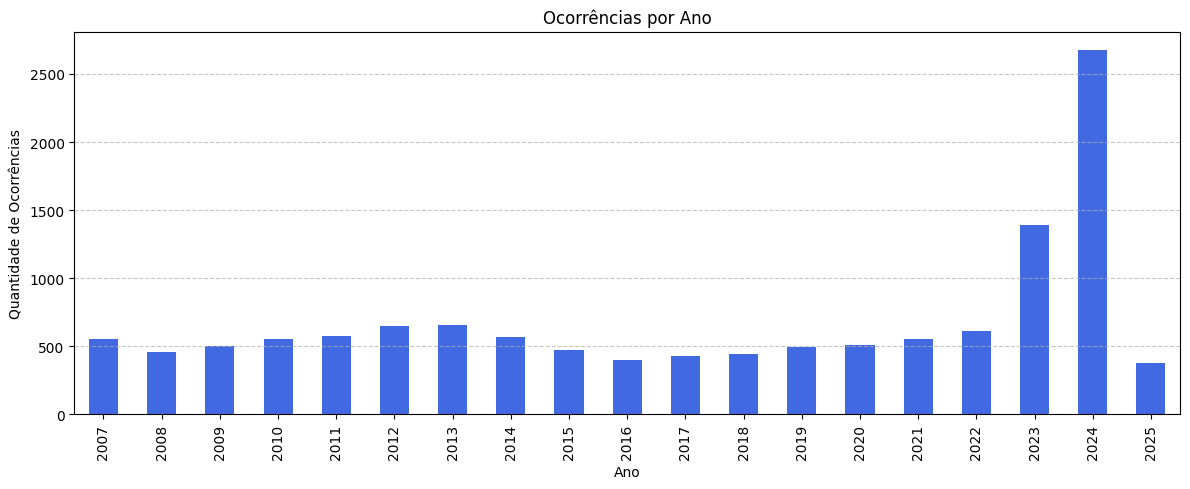

In [24]:
# Ocorrências por ano
df_ocorrencias['ano'] = df_ocorrencias['ocorrencia_dia'].dt.year
plt.figure(figsize=(12,5))
df_ocorrencias['ano'].value_counts().sort_index().plot(kind='bar', color='royalblue')
plt.title('Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Ocorrências')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Através deste gráfico, pode-se observar um aumento expressivo no número de ocorrências entre 2023 e 2024. Diante desse crescimento, é importante analisar com mais detalhes quais tipos de falhas foram responsáveis por esse aumento, a fim de identificar as principais causas e propor ações corretivas.

In [25]:
df_ocorrencias_tipo_merged= pd.merge(
    df_ocorrencias,
    df_ocorrencias_tipo,
    left_on='codigo_ocorrencia',   # nome no df_ocorrencias
    right_on='codigo_ocorrencia1', # nome no df_ocorrencias_tipo
    how='left'
)

<Figure size 1200x600 with 0 Axes>

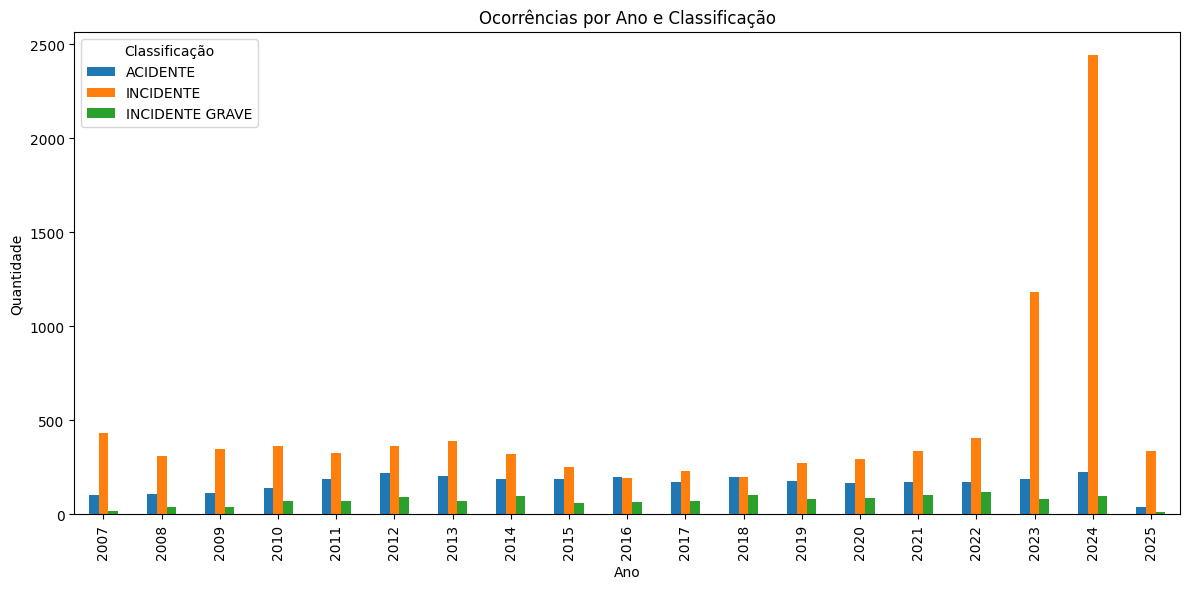

In [26]:
plt.figure(figsize=(12,6))
df_ocorrencias_tipo_merged.groupby(['ano', 'ocorrencia_classificacao'],observed=True).size().unstack().plot(
    kind='bar', stacked=False, figsize=(12,6))
plt.title('Ocorrências por Ano e Classificação')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Classificação')
plt.tight_layout()
plt.show()

Ao analisar este gráfico, após a classificação em Acidente, Incidente e Incidente Grave, é possível afirmar que, nos anos de 2023 e 2024, houve um aumento expressivo no número de incidentes.


### 4.2 Análise de Incidentes

Estou criando o filtro de INCIDENTE para possibilitar uma análise mais detalhada

In [27]:
df_incidentes = df_ocorrencias_tipo_merged[df_ocorrencias_tipo_merged['ocorrencia_classificacao'] == 'INCIDENTE']

/tmp/ipython-input-28-1342910256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


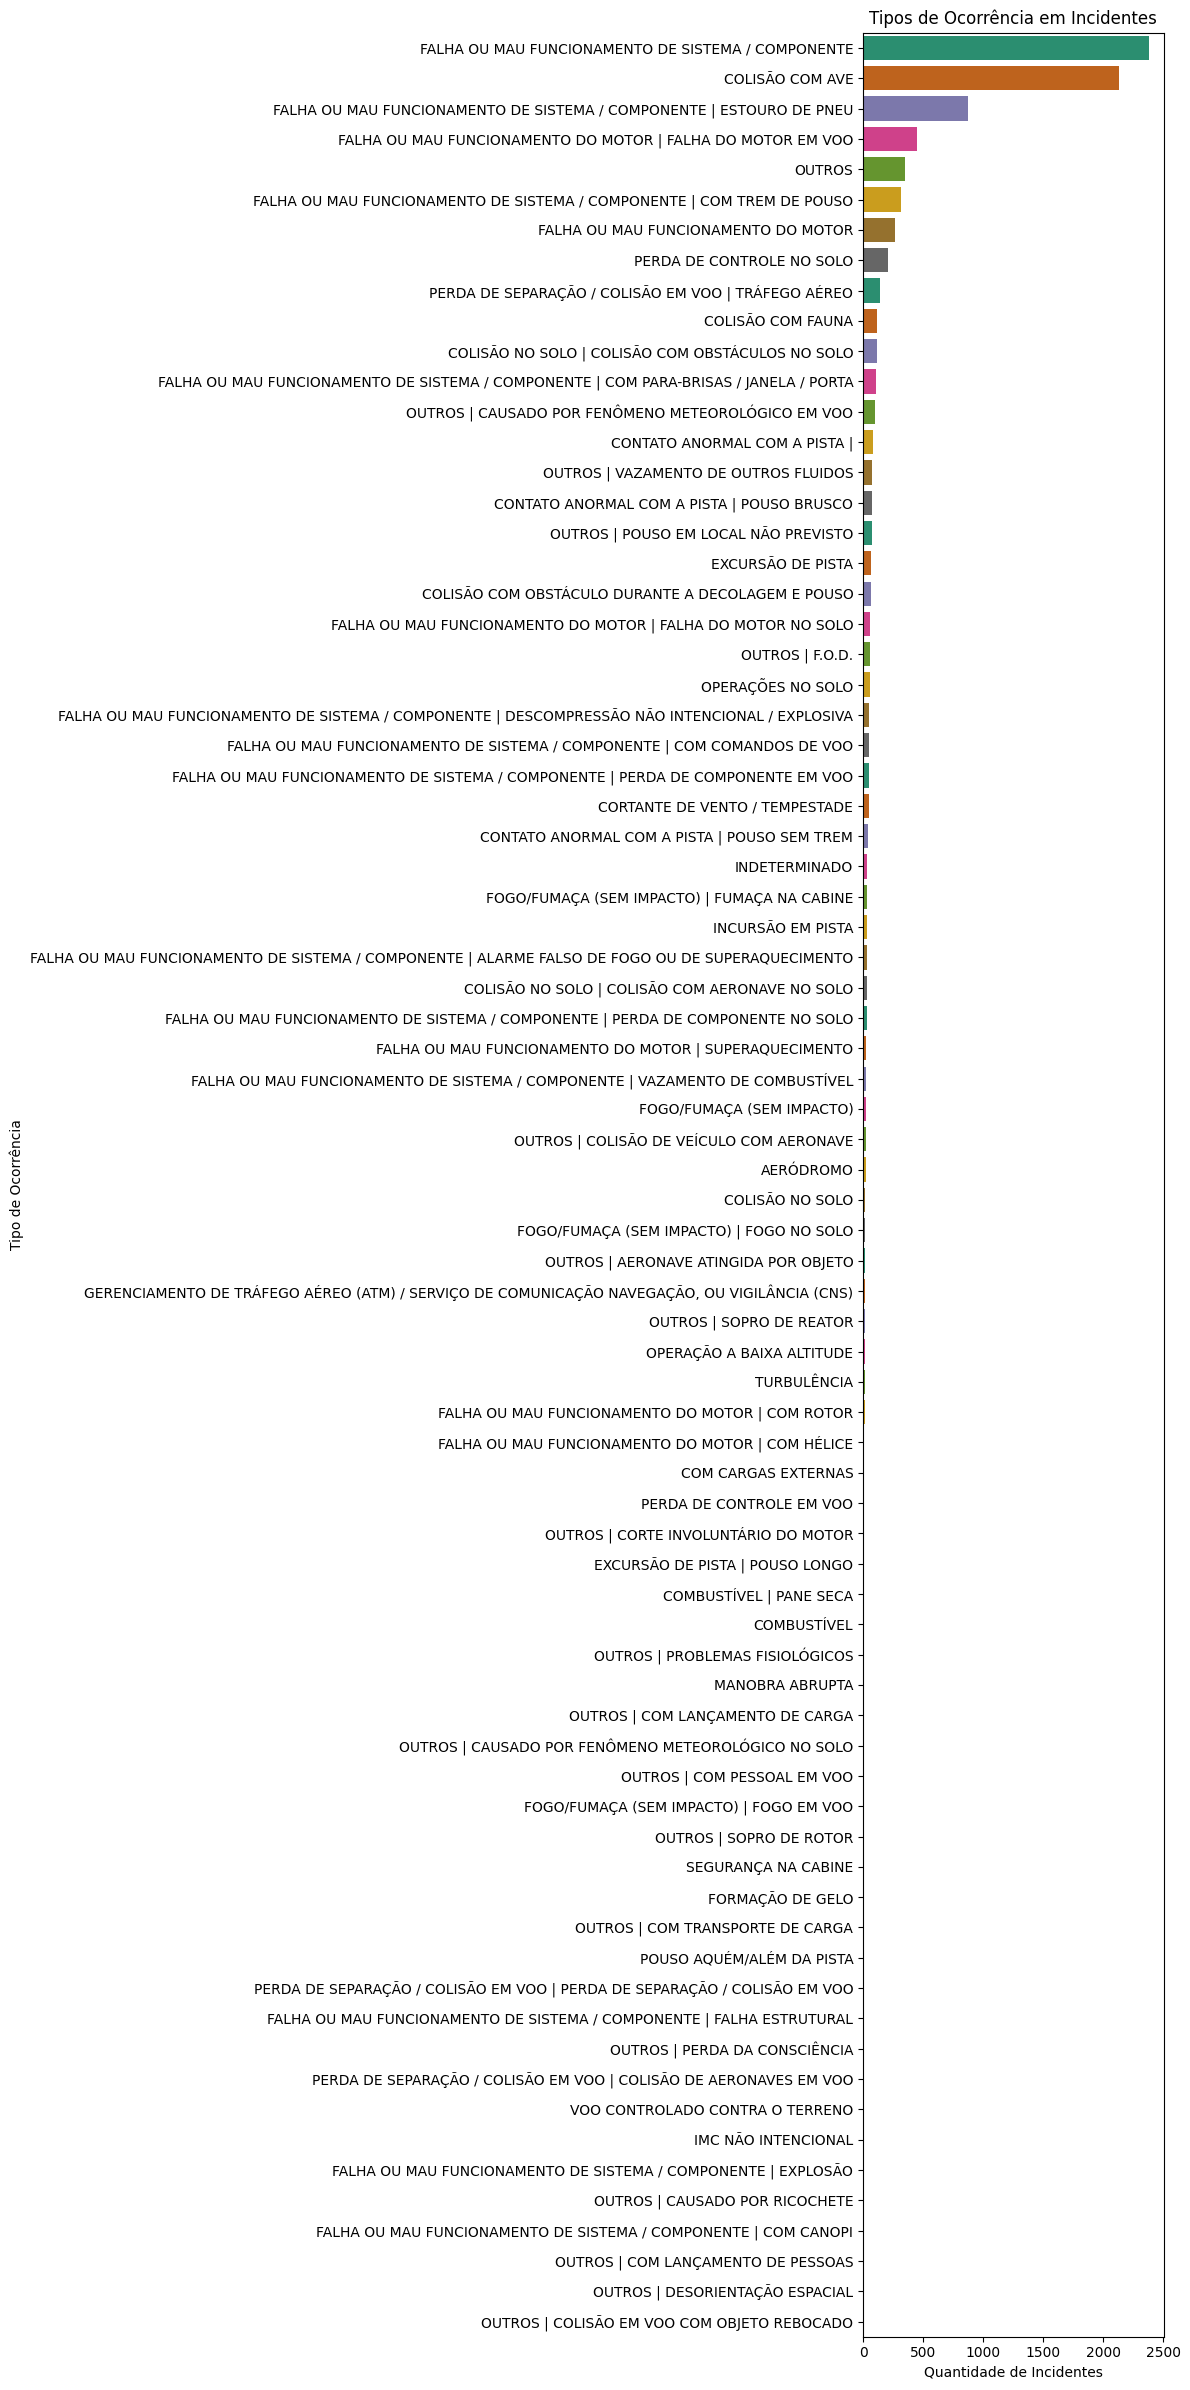

In [28]:
contagem_tipos = df_incidentes['ocorrencia_tipo_categoria'].value_counts()

plt.figure(figsize=(12,24))  # Ajusta a altura conforme o número de categorias
sns.barplot(
    y=contagem_tipos.index,
    x=contagem_tipos.values,
    palette='Dark2'
)
plt.title('Tipos de Ocorrência em Incidentes')
plt.xlabel('Quantidade de Incidentes')
plt.ylabel('Tipo de Ocorrência')
plt.tight_layout()
plt.show()

Neste gráfico, é possível identificar que, entre os tipos de INCIDENTE, o item mais expressivo é Falhas ou Mau funcionamento de Sistema. Além disso, observa-se um problema de padronização na categorização dos dados.

As categorias foram separadas por barras, reunidas em uma lista única e os valores nulos foram eliminados.

In [29]:
tipos_ocorrencias_df = df_incidentes['ocorrencia_tipo_categoria'].str.split(r'[/|]')
tipos_ocorrencias = sum(tipos_ocorrencias_df.dropna(),[])


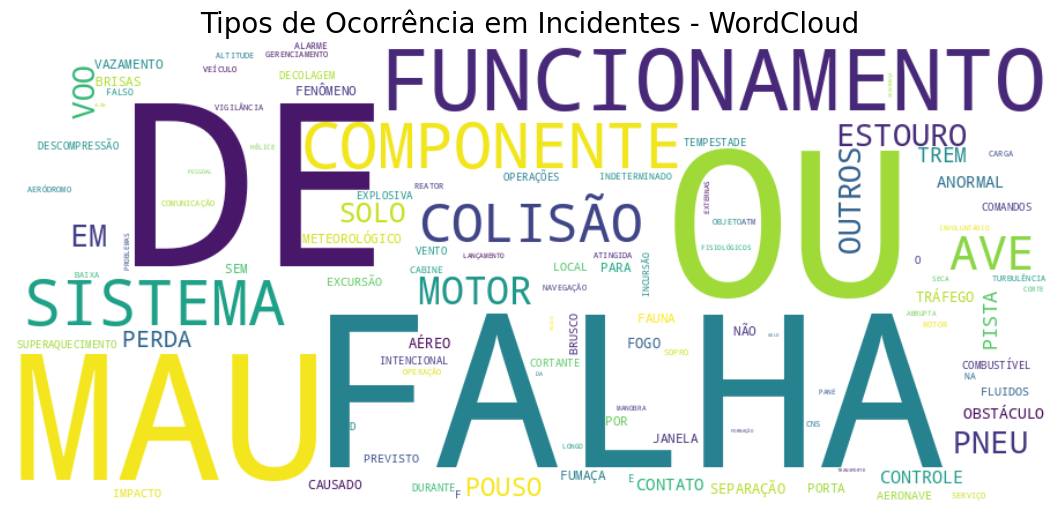

In [30]:
# Limpa os espaços no início/fim de cada causa
tipos_ocorrencias_limpo = [t.strip() for t in tipos_ocorrencias if isinstance(t, str)]

# Junta tudo em uma única string separada por espaço
texto_wordcloud = " ".join(tipos_ocorrencias_limpo)

# Gera a WordCloud
wordcloud = WordCloud(width=900, height=400, background_color='white', collocations=False).generate(texto_wordcloud)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tipos de Ocorrência em Incidentes - WordCloud", fontsize=20)
plt.show()

A análise deste gráfico não permitiu evidenciar, com base nas palavras-chave, qual falha é mais expressiva. Sendo assim, outro método de análise será utilizado.

Aqui estou limpando os tipos de ocorrências, contando quantas vezes cada um aparece e selecionando as 10 causas de incidentes mais frequentes.

In [31]:
tipos_ocorrencias_limpo = [t.strip() for t in tipos_ocorrencias if isinstance(t, str)]
contagem = Counter(tipos_ocorrencias_limpo)
mais_frequentes = contagem.most_common(10)
causas, frequencias = zip(*mais_frequentes)


Agora, estou gerando um gráfico de barras para visualizar as 10 causas de incidentes mais comuns, com as mais frequentes no topo.

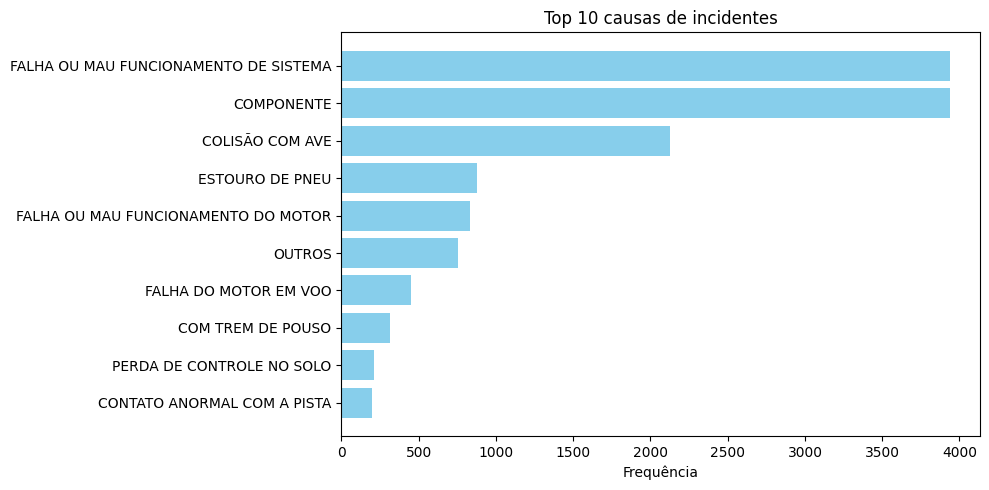

In [32]:
plt.figure(figsize=(10, 5))
plt.barh(causas, frequencias, color='skyblue')
plt.xlabel("Frequência")
plt.title("Top 10 causas de incidentes")
plt.gca().invert_yaxis()  # Mais frequentes em cima
plt.tight_layout()
plt.show()

Com “Falha ou Mau funcionamento do Sistema” e “Componente” entre as causas mais expressivas, o gráfico já indica uma tendência que pode confirmar nossas hipóteses sobre **problemas de Manutenção**.

## 4.3 Categorização de ocorrências

A categorização das ocorrências está sendo realizada com base nas categorias que foram identificadas nas etapas anteriores da análise.

In [33]:
display(tipos_ocorrencias_df)

,ocorrencia_tipo_categoria
1,"[FALHA OU MAU FUNCIONAMENTO DE SISTEMA , COMP..."
2,"[FALHA OU MAU FUNCIONAMENTO DE SISTEMA , COMP..."
3,[COLISÃO COM AVE]
6,[COLISÃO NO SOLO]
7,"[FALHA OU MAU FUNCIONAMENTO DE SISTEMA , COMP..."
...,...
13532,"[COLISÃO NO SOLO , COLISÃO COM OBSTÁCULOS NO ..."
13536,"[FALHA OU MAU FUNCIONAMENTO DE SISTEMA , COMP..."
13537,"[COLISÃO NO SOLO , COLISÃO COM AERONAVE NO SOLO]"
13540,"[COLISÃO NO SOLO , COLISÃO COM AERONAVE NO SOLO]"


Unindo as categorias limpas e tratadas às ocorrências.

In [34]:
df_incidentes["categoria_localizada"] = tipos_ocorrencias_df.apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)
df_incidentes['categoria_localizada'] = df_incidentes['categoria_localizada'].str.strip()

/tmp/ipython-input-34-1579784361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidentes["categoria_localizada"] = tipos_ocorrencias_df.apply(
/tmp/ipython-input-34-1579784361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidentes['categoria_localizada'] = df_incidentes['categoria_localizada'].str.strip()


### Analisando a proporção de categoria das ocorrências

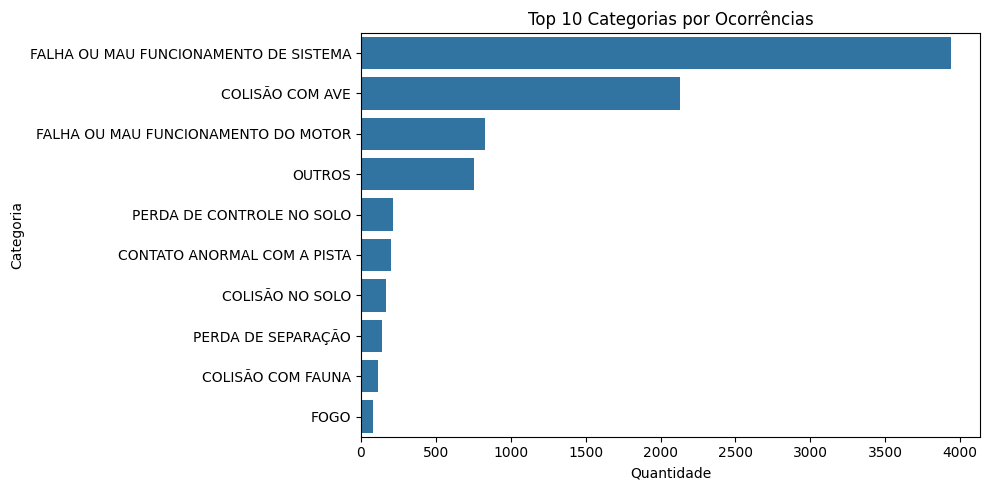

In [35]:
top10 = df_incidentes['categoria_localizada'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    y=top10.index,
    x=top10.values,
    orient='h'

)
plt.xlabel("Quantidade")
plt.ylabel("Categoria")
plt.title("Top 10 Categorias por Ocorrências")
plt.tight_layout()
plt.show()

Através do Gráfico: Ocorrências por Categoria, é possível visualizar que o maior número de ocorrências ocorreram por " Falha ou Mau Funcionamento do sistema"



### Entendendo o tipo de "FALHA  OU MAU FUNCIONAMENTO DE SISTEMA"

In [36]:
df_falhas = df_incidentes[df_incidentes["categoria_localizada"] == "FALHA OU MAU FUNCIONAMENTO DE SISTEMA"]
display(df_falhas)

,codigo_ocorrencia,ocorrencia_dia,ocorrencia_classificacao,ano,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,categoria_localizada
1,86682,2024-10-04,INCIDENTE,2024,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
2,86678,2025-03-08,INCIDENTE,2025,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
7,86672,2025-03-02,INCIDENTE,2025,86672,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
9,86670,2025-03-01,INCIDENTE,2025,86670,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
10,86669,2025-02-28,INCIDENTE,2025,86669,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
...,...,...,...,...,...,...,...,...,...
13484,30416,2007-08-19,INCIDENTE,2007,30416,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
13497,30095,2007-01-18,INCIDENTE,2007,30095,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
13499,30076,2007-05-28,INCIDENTE,2007,30076,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA
13528,29776,2007-03-20,INCIDENTE,2007,29776,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA


Analisando quais as principais falhas nas ocorrências

/tmp/ipython-input-37-1836245462.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


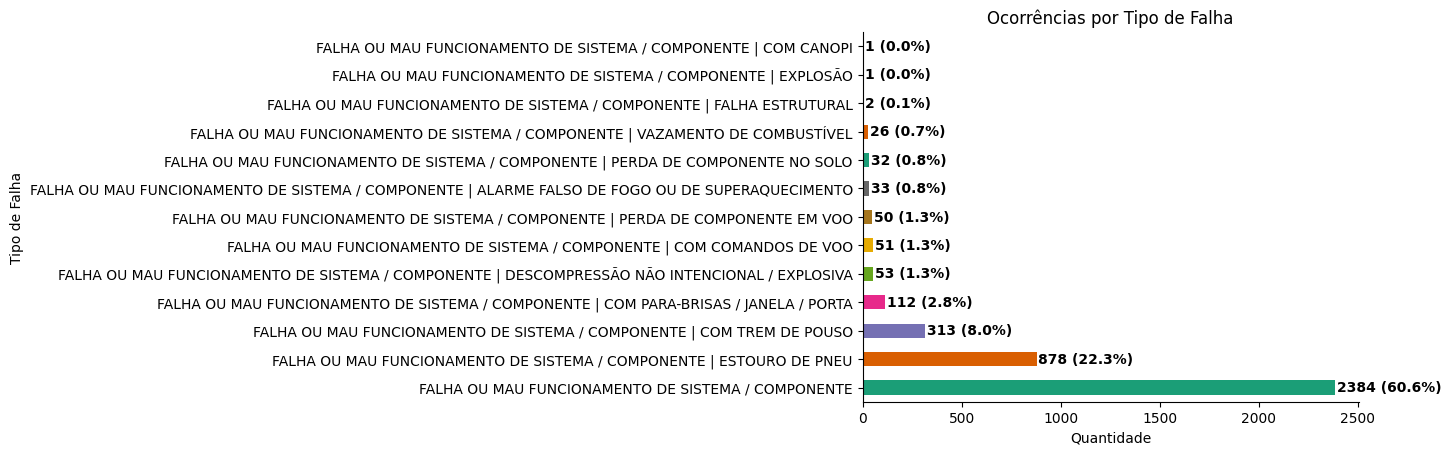

In [37]:
contagem = df_falhas['ocorrencia_tipo_categoria'].value_counts()
total = contagem.sum()

ax = contagem.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Falha')
plt.title('Ocorrências por Tipo de Falha')

for i, v in enumerate(contagem):
    percentual = 100 * v / total
    ax.text(v + 10, i, f"{v} ({percentual:.1f}%)", color='black', va='center', fontweight='bold')


plt.tight_layout()
plt.show()

Através deste gráfico, podemos afirmar que a maioria das ocorrência, ocorrem por falha de mau funcionamento de Componente, comprovando a hipótese de que a falta de manutenção tem contribuído para o aumento de incidentes.

### Unindo os Tipos de "Falha" , com os modelos de Aeronaves

In [38]:
df_falhas = df_falhas.copy()
df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'}, inplace=True)

df_falhas_aeronave = pd.merge(df_falhas, df_aeronave, on="codigo_ocorrencia", how="left")
df_falhas_aeronave_filtrado = df_falhas_aeronave[['codigo_ocorrencia','ocorrencia_tipo_categoria','aeronave_tipo_veiculo','aeronave_tipo_operacao','aeronave_fabricante']].copy()
display(df_falhas_aeronave_filtrado)

,codigo_ocorrencia,ocorrencia_tipo_categoria,aeronave_tipo_veiculo,aeronave_tipo_operacao,aeronave_fabricante
0,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,HELICÓPTERO,POLICIAL,EUROCOPTER
1,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,HELICÓPTERO,TÁXI AÉREO,SIKORSKY
2,86672,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,PRIVADA,CESSNA AIRCRAFT
3,86670,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,***,PRIVADA,PIPER AIRCRAFT
4,86669,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,***,PRIVADA,EMBRAER
...,...,...,...,...,...
3932,30416,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,INSTRUÇÃO,NEIVA INDUSTRIA AERONAUTICA
3933,30095,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,REGULAR,BOEING COMPANY
3934,30076,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,ESPECIALIZADA,CESSNA AIRCRAFT
3935,29776,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,ESPECIALIZADA,REIMS AVIATION


### Unindo: Falhas dos veículos/aeronaves com os fatores

In [39]:
df_falhas_fatores = pd.merge(
    df_falhas_aeronave_filtrado,
    df_fator_contribuinte,
    left_on='codigo_ocorrencia',
    right_on='codigo_ocorrencia3',
    how='left'
)

### Analisando o Tipo de Veículo, com a quantidade de Falhas

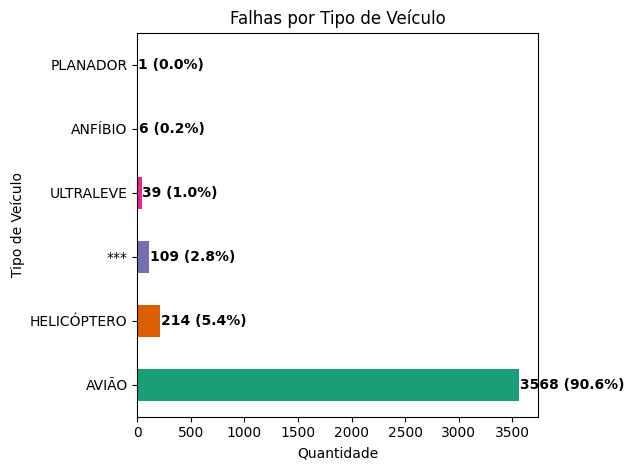

In [40]:
contagem_veiculo = df_falhas_aeronave_filtrado['aeronave_tipo_veiculo'].value_counts()
ax = contagem_veiculo.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Falhas por Tipo de Veículo')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Veículo')

for i, v in enumerate(contagem_veiculo):
    percentual = 100 * v / contagem_veiculo.sum()
    ax.text(v + 5, i, f"{v} ({percentual:.1f}%)", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

Pode-se observar através deste gráfico, que o maior número de falhas, ocorrem em **Avião/Aviões***

Visualizando este gráfico, pode-se verificar que o maior número de Falhas ocorrem em Avião, e o tipo de Falha com maior percentual é Falha Operaional

/tmp/ipython-input-41-2106402210.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


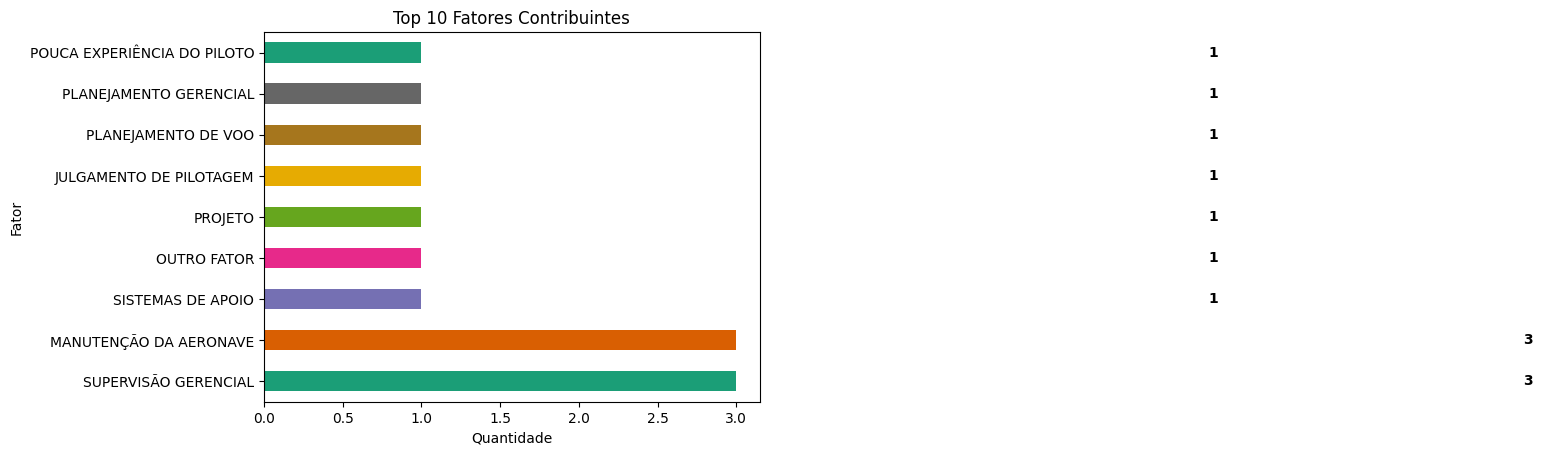

In [41]:
top_fatores = df_falhas_fatores['fator_nome'].value_counts().head(10)
ax = top_fatores.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Top 10 Fatores Contribuintes')
plt.xlabel('Quantidade')
plt.ylabel('Fator')
for i, v in enumerate(top_fatores):
    ax.text(v + 5, i, f"{v}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

Através deste gráfico, pode-se afirmar que os fatores contribuintes não impacactam nas análises anteriores, já realizadas.

### Visualizando os Aspectos dos Fatores Contribuintes

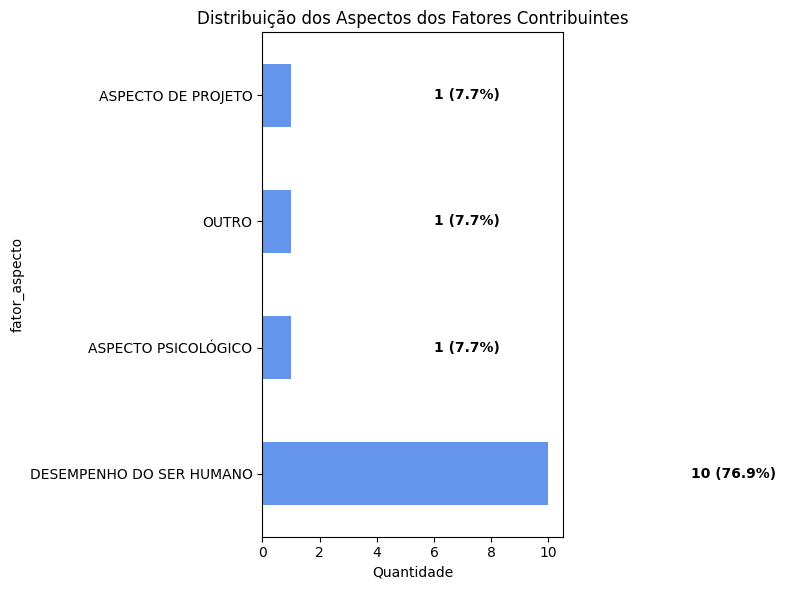

In [42]:
import matplotlib.pyplot as plt

contagem = df_falhas_fatores['fator_aspecto'].value_counts()
total = contagem.sum()

ax = contagem.plot(kind='barh', color='cornflowerblue', figsize=(10,6))
plt.title('Distribuição dos Aspectos dos Fatores Contribuintes')
plt.xlabel('Quantidade')

# Adiciona rótulo com valor e percentual
for i, v in enumerate(contagem):
    percentual = 100 * v / total
    ax.text(v + 5, i, f"{v} ({percentual:.1f}%)", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Os Aspectos dos Fatores Contribuintes, destaca-se o desempenho do ser humano.
No entanto, pode-se afirmar que os fatores contribuintes não impacactam nas análises anteriores, já realizadas.

#5. Modelo de Previsão

Importando Bibliotecas de previsão/predição

Divisão em treino e teste


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


Vamos selecionar as categorias mais frequentes para o modelo

In [44]:
top_categorias = df_incidentes['categoria_localizada'].value_counts().nlargest(10).index
df_incidentes_filtered = df_incidentes[df_incidentes['categoria_localizada'].isin(top_categorias)].copy()

Vamos usar o ano e o mês como features

In [45]:
df_incidentes_filtered['ano'] = df_incidentes_filtered['ocorrencia_dia'].dt.year
df_incidentes_filtered['mes'] = df_incidentes_filtered['ocorrencia_dia'].dt.month

Definindo a variável alvo e as features

In [46]:
X = df_incidentes_filtered[['ano', 'mes']]
y = df_incidentes_filtered['categoria_localizada']

Dividindo os dados em treino e teste

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Treinando um modelo RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Fazendo previsões no conjunto de teste

In [49]:
y_pred = model.predict(X_test)

Neste trecho, estou gerando e visualizando uma matriz de confusão para avaliar o desempenho do meu modelo de classificação.
A matriz mostra, para cada categoria real (no eixo vertical), quantas vezes ela foi prevista corretamente (valores na diagonal principal) e quantas vezes foi confundida com outras categorias (valores fora da diagonal).

Valores na diagonal (de cima à esquerda para baixo à direita) indicam previsões corretas, ou seja, o número de vezes em que a categoria real bateu com a prevista.

Valores fora da diagonal mostram os erros de classificação, indicando como o modelo está confundindo as categorias.

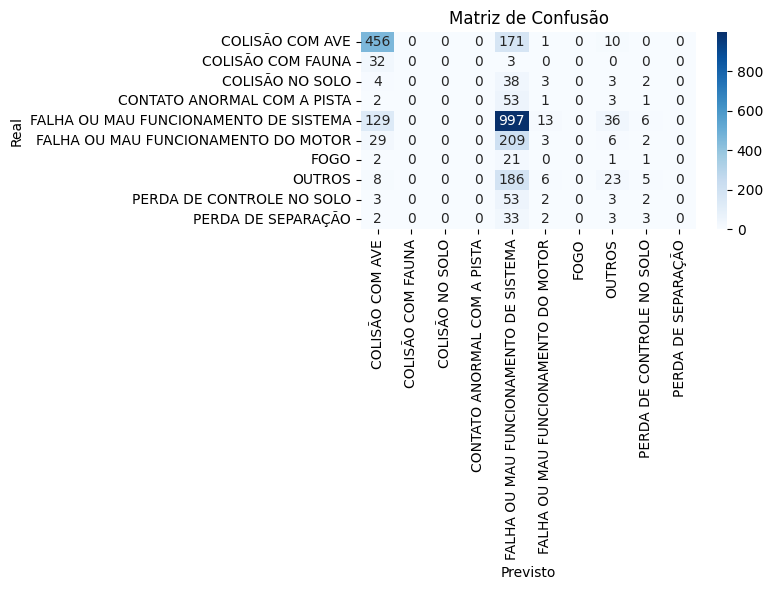

In [50]:
cm = confusion_matrix(y_test, y_pred)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

Essa matriz permite identificar facilmente quais classes estão sendo mais bem classificadas e onde ocorrem mais erros, auxiliando na análise da performance do modelo.

# 6. Conclusão

A análise exploratória dos dados de ocorrências aeronáuticas revelou um aumento notável no número de incidentes nos anos de 2023 e 2024. Ao investigar os tipos de ocorrência mais frequentes, identificou-se que a categoria "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE" é a mais expressiva entre os incidentes.

Aprofundando a análise sobre as falhas e mau funcionamento, verificou-se que a maioria dessas ocorrências está relacionada a problemas em componentes e sistemas das aeronaves. A hipótese inicial sobre a contribuição da falta de manutenção para o aumento de incidentes parece ser corroborada por este achado.

Ao analisar as falhas por tipo de veículo, constatou-se que os aviões são o tipo de aeronave com o maior número de falhas registradas. Em relação aos fatores contribuintes, embora o desempenho humano tenha se destacado como um aspecto relevante, a análise sugeriu que os fatores contribuintes em geral não impactam significativamente as conclusões sobre as falhas de sistema/componente e o tipo de aeronave envolvida.

Para complementar a análise, foi iniciado o processo de construção de um modelo de previsão para os tipos de acidentes, utilizando os dados históricos. A preparação dos dados envolveu a seleção de features relevantes, a criação de novas variáveis temporais (ano e mês) e a aplicação de one-hot encoding em variáveis categóricas. Um modelo RandomForestClassifier foi treinado e a matriz de confusão foi gerada para avaliação inicial. No entanto, a análise aprofundada do desempenho do modelo e a interpretação de suas previsões ainda podem ser exploradas em etapas futuras.

Em suma, os resultados da análise apontam para a necessidade de atenção especial às falhas de sistema e componente em aeronaves, particularmente em aviões, como um fator chave contribuinte para o aumento recente de incidentes aeronáuticos. Investigações mais aprofundadas sobre as causas raiz dessas falhas e a implementação de medidas preventivas direcionadas podem ser cruciais para mitigar esse problema.